In [1]:
import pandas as pd
import numpy as np
import re

#### My twitter data is not included in the git ^^

In [2]:
FILENAME = '<your filename>.csv'
data = pd.read_csv(FILENAME)
print('Length raw data:', len(data))

Length raw data: 791


In [3]:
data.head()

,ID,Created at,Lang,Text,Hashtags,Media,URLS,Likes,Relay,Retweet
0,1300749838191980546,2020-09-01 10:58:22+00:00,tl,okayy tapos na mag workout. Sa oct 1 na ulit,[],[],[],3,0,0
1,1112328470032347136,2019-03-31 12:19:07+00:00,tl,5 mins pa lang sa court deds na ko jskoo half ...,[],[],[],5,0,0
2,1101835295983493123,2019-03-02 13:23:00+00:00,tl,di sa pagmamayabang pero naligo ako kahit wala...,[],[],[],10,0,0
3,1155121519401418753,2019-07-27 14:23:26+00:00,in,si shane ang polar bear,[],[],[],0,0,0
4,1245576721534840832,2020-04-02 05:00:06+00:00,tl,yawa ewan na 🤦‍♀️🤦‍♀️🤦‍♀️ https://t.co/qwaKAcM...,[],[],[{'url': 'https://t.co/qwaKAcMe5u'}],0,0,0


### Remove retweets

In [4]:
data = data[~data.Text.str.contains("RT")]
print('Length of data:', len(data))

Length of data: 664


### Remove links

In [5]:
def remove_url(text):
    return re.sub(r"http\S+", "", text)

### Remove tags

In [6]:
def remove_tags(text):
    return re.sub(r"@\S+", "", text)

### Remove Emoji

In [7]:
EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")

In [8]:
def remove_emoji(text):
    return re.sub(EMOJI_PATTERN, r"", text)

### Remove special characters

In [9]:
def remove_specialChar(text):
    return re.sub('[^A-Za-z0-9]+', ' ', text)

In [10]:
for i in range(len(data)):
    text = remove_url(data['Text'].iloc[i])
    text = remove_tags(text)
    text = remove_emoji(text)
    text = remove_specialChar(text)
    data['Text'].iloc[i] = text.lower()

664


C:\Users\ericasagun\Documents\BARMM Data Challenge\SagesBARMM\env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
data.tail(50)

,ID,Created at,Lang,Text,Hashtags,Media,URLS,Likes,Relay,Retweet
728,993022129787437057,2018-05-06 06:58:19+00:00,tl,sa sobrang broke pati utang ng batchmates nung...,[],[],[],16,0,1
730,932117139514834945,2017-11-19 05:23:38+00:00,ja,,[],[],[],0,0,0
731,1154037579341189121,2019-07-24 14:36:14+00:00,und,,[],[],[],6,0,0
733,1190048675008958464,2019-10-31 23:31:28+00:00,tl,magandang umaga mga ka ot,[],[],[],2,0,0
734,1296829541826965505,2020-08-21 15:20:31+00:00,en,i miss my friends,[],[],[],2,0,0
735,1182437116413792256,2019-10-10 23:25:51+00:00,en,nvm found him,[],[],[{'url': 'https://t.co/FQfrFeCQOO'}],6,0,0
737,1091771447104626688,2019-02-02 18:52:51+00:00,es,torete,[],[],[],0,0,0
739,967735718825967616,2018-02-25 12:19:09+00:00,tl,sana hindi sa beach ang company outing lumalap...,[],[],[],3,0,0
740,959338626382422016,2018-02-02 08:12:06+00:00,tl,sinong nasa instat haha,[],[],[],0,0,0
741,1095002344238927872,2019-02-11 16:51:17+00:00,und,pssssssssst,[],[],[{'url': 'https://t.co/COjDtDoSVV'}],4,0,0


In [12]:
tweets = list(data['Text'])
len(tweets)

664

In [14]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam

### Tokenize tweets

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
total_words = len(tokenizer.word_index) + 1

print('Total words:', total_words)

Total words: 1801


In [16]:
input_sequences = []

for tweet in tweets:
    token_list = tokenizer.texts_to_sequences([tweet])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

### Defining the model

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### Training the model

In [19]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
120/120 [==============================] - 10s 45ms/step - loss: 7.0885 - accuracy: 0.0344
Epoch 2/100
120/120 [==============================] - 5s 44ms/step - loss: 6.2024 - accuracy: 0.0473
Epoch 3/100
120/120 [==============================] - 5s 44ms/step - loss: 5.4920 - accuracy: 0.0966
Epoch 4/100
120/120 [==============================] - 5s 45ms/step - loss: 4.5339 - accuracy: 0.1712
Epoch 5/100
120/120 [==============================] - 5s 44ms/step - loss: 3.3153 - accuracy: 0.3245
Epoch 6/100
120/120 [==============================] - 5s 44ms/step - loss: 2.2194 - accuracy: 0.5108
Epoch 7/100
120/120 [==============================] - 5s 42ms/step - loss: 1.3763 - accuracy: 0.6813
Epoch 8/100
120/120 [==============================] - 5s 45ms/step - loss: 0.9385 - accuracy: 0.7804
Epoch 9/100
120/120 [==============================] - 5s 42ms/step - loss: 0.6093 - accuracy: 0.8548
Epoch 10/100
120/120 [==============================] - 4s 37ms/step - loss: 0.44

In [20]:
import matplotlib.pyplot as plt

In [21]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()

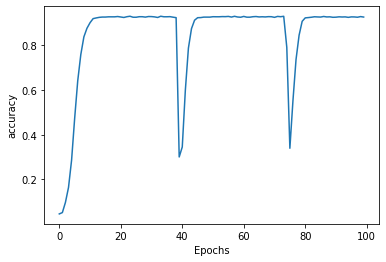

In [22]:
plot_graphs(history, 'accuracy')

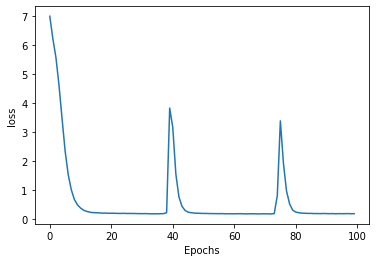

In [23]:
plot_graphs(history, 'loss')

### Test model

In [24]:
seed_text = 'hi'
next_words = 1

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

C:\Users\ericasagun\Documents\BARMM Data Challenge\SagesBARMM\env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


hi good


In [26]:
import pickle

In [27]:
with open('./model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [53]:
model.save('./model/tweet_model.h5')